Introdução à computação – 13/06/2016
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [ ]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

In [1]:
# Somente estes módulos podem ser importados para a realização das questões
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
%matplotlib inline

Questão 1 (1,5 pontos)  

Mostre graficamente que $ \sin ^2 x + \cos^2 x = 1. $  

Dica: para melhor visualização do gráfico, mude a escala dos eixos com $plt.axis([x_{min},x_{max},y_{min},y_{max}])$

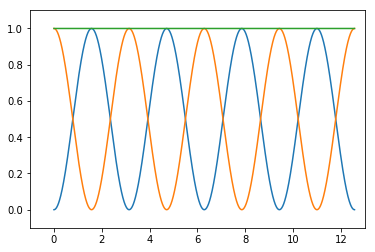

In [11]:
x = np.linspace(0, 4 * np.pi , 2000)
y1 = np.sin(x)**2
y2 = np.cos(x)**2
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y1+y2)
plt.axis([-1,13,-0.1,1.1])
plt.show()

Questão 2 (2.5 pontos)  

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:
- Identificar os candidatos a nomes próprios do texto e a frequência com que aparecem;
- Identificar as 5 palavras mais comuns;
- Identificar os tritongos;
- Salvar os resultados em um arquivo chamado "respostas_q2.txt" no computador

In [ ]:
url = 'http://norvig.com/big.txt'
page = requests.get(url)
html = page.text
sopa = bs(html, "lxml")
texto = sopa.text

In [ ]:
#seu código aqui

Questão 3 (3 pontos)  

Uma permutação é um arranjo ordenado de objetos. Por exemplo, $ 3124 \ $ é uma das possíveis permutações dos dígitos $1, 2, 3$ e $4$. Se todas as permutações são ordenadas numericamente, chamamos a este arranjo de ordem lexicográfica. As permutações lexicográficas de $0, 1$ e $2$ são:  

$012\;021\;102\;120\;201\;210$    

Qual o milionésimo elemento da ordenação lexicográfica dos dígitos $0, 1, 2, 3, 4, 5, 6, 7, 8$ e $9$?   

In [26]:
numeros = [0,1,2,3,4,5,6,7,8,9]

def adnums(elemento):
    lista = []
    i = 0
    while i < 10:
        testar = str(elemento)
        testar += str(numeros[i])
        if len(testar) == len(set(testar)):
            lista.append(testar)
        i += 1
    return lista

ord_lex = []
for k1 in numeros:
    numeros = adnums(k1)


# for k in range(10):
#     elemento = k
#     for k in range(10):
#         ord_lex += adnums(elemento)
        
# ord_lex

IndexError: list index out of range

In [24]:
def adnums(elemento):
    lista = []
    i = 0
    while i < 10:
        testar = str(elemento)
        testar += str(numeros[i])
        if len(testar) == len(set(testar)):
            lista.append(testar)
        i += 1
    return lista

In [25]:
adnums(0)

['01', '02', '03', '04', '05', '06', '07', '08', '09']

Questão 4 (3 pontos) 

Implemente em Python uma classe chamada “Drone” com as seguintes propriedades:  
- Quando instanciado, tem bateria carregada e está na posição $(x=0,y=0,z=0)$ metros;  
- Possui bateria para duração 20 minutos;  
- Consegue andar 1 m/s na vertical e 2 m/s na horizontal;  
- Possui o metodo “voar”, que recebe uma coordenada de destino $(x_1,y_1)$. Esse método calcula a distância a navegar e avalia se o drone possui energia para chegar nestas coordenadas.  
- Possui métodos para carregar a bateria, dizer a autonomia da bateria (em segundos), dizer a distância percorrida desde a última carga e a distância total percorrida desde que foi instanciado.  
- Possui um método para dizer a coordenada atual

OBS: Considere que o drone sempre ascende verticalmente até 20m antes de se deslocar horizontalmente, e percorre a mesma distância verticalmente. A distância percorrida na horizontal é o menor caminho entre as coordenadas de origem e destino. Use a fórmula: $$distância = \sqrt{(x_1-x_0)^2 + (y_1-y_0)^2}$$

In [76]:
class Drone:
    
    def __init__(self):
        self.x = 0
        self.y = 0#z=0
        self.autonomia = 1200 #quantos segundos de funcionamento tem ao existir.
        self.distot = 0
        self.disultcarg = 0
        
    def voar(self, x1, y1):
        velvert = 1
        velhorz = 2
        x0 = self.x
        y0 = self.y
        disthorz = ((x1 - x0)**2 + (y1 - y0)**2)**(1/2)
        gast = (disthorz/ (2 * velhorz)) + 40 #20 segundos de subida e 20 de descida
        if self.autonomia>= gast:
            self.autonomia -= gast
            print('distância:{}, tem energia'.format(disthorz+40))
            self.distot += disthorz + 40
            self.disultcarg += disthorz + 40
            self.x += x1
            self.y += y1
        else:
            print('distância:{}, não tem energia'.format(disthorz+40))
            
    def carregar(self):
        self.autonomia = 1200
        self.disultcarg = 0
        
    def autonomia(self):
        print('{} segundo(s)'.format(self.autonomia))
        return self.autonomia
    
    def distot(self):
        print('{} metro(s)'.format(self.distot))
        return self.distot
    
    def disultcarg(self):
        print('{} metro(s)'.format(self.disultcarg))
        return self.disultcarg
    
    def posicao(self):
        print('X = {}, Y = {}'.format(self.x,self.y))

In [77]:
drone = Drone()

In [86]:
drone.voar(20,30)

distância:148.16653826391968, tem energia


In [87]:
drone.posicao()

X = 100, Y = 150


Questão Bônus (0,5 pontos)  

O problema de Monty Hall, também conhecido por paradoxo de Monty Hall é um problema matemático e paradoxo que surgiu a partir de um concurso televisivo dos Estados Unidos chamado "Let’s Make a Deal", exibido na década de 1970. O jogo consiste no seguinte: Monty Hall (o apresentador) apresentava 3 portas aos concorrentes, sabendo que atrás de uma delas está um carro (prêmio bom) e que as outras têm prêmios de pouco valor.

- Na 1ª etapa o concorrente escolhe uma porta (que ainda não é aberta);  
- Em seguida, Monty abre uma das outras duas portas que o concorrente não escolheu, sabendo de antemão que o carro não se encontra na porta que abrirá;  
- Agora com duas portas apenas para escolher — pois uma delas já se viu, na 2ª etapa, que não tinha o prêmio — e sabendo que o carro está atrás de uma delas, o concorrente tem que se decidir se permanece com a porta que escolheu no início do jogo e abre-a ou se muda para a outra porta que ainda está fechada para então a abrir.  

Demonstre graficamente que é mais provável ganhar o prêmio se trocar de porta do que se não o fizer. Quais as probabilidade de acertar, em ambos os casos?

In [ ]:
#seu código aqui

Auto-avaliação (0,5 pontos)  
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 0,5, levando em consideração o aproveitamento na disciplina.  